In [ ]:
'''
we plot the results for the models trained in
parsingdifferentModel.ipynb
'''



In [14]:
'''
TKET MODEL
'''
import pickle

model = 'TKet'
nQ = 2

GIJS = False

AE = True 

if nQ == 1:
    if model == 'TKet':
        filename = '../modelParameters/TKetModel1Qb_500'
    elif model == 'Numpy':
        filename = '../modelParameters/NumpyModel1QB_500'
    else: 
        filename = '../modelParameters/PennylaneModel1QB_500'
    
if nQ == 2:
    if model == 'TKet':
        filename = '../modelParameters/TKetModel2QB_500'
    elif model == 'Numpy':
        filename = '../modelParameters/NumpyModel2QB_500'
    else: 
        filename = '../modelParameters/PennylaneModel2QB_500'

if AE:
    if model == 'TKet':
        filename = '../modelParameters/TKetModelAE_2QB_500'
    elif model == 'Numpy':
        filename = '../modelParameters/NumpyModel_AE_2QB_500'
    else: 
        filename = '../modelParameters/PennylaneModel_AE_2QB_500'


if GIJS: 
    if model == 'TKet':
        filename = '../modelParameters/TKetModel2QB_gijs_500'
    elif model == 'Numpy':
        filename = '../modelParameters/NumpyModel2QB_gijs_500'
    else: 
        filename = '../modelParameters/PennylaneModel2QB_gijs_500'

print(filename)
# filename = '../modelParameters/PennylaneModelAE_Gijs_2QB_500'

with open(filename+'.pkl', 'rb') as fp: 
    dump_data = pickle.load(fp)

train_cost = dump_data['train_epoch_cost']
train_acc = dump_data['train_eval_results']
val_cost = dump_data['val_costs']
val_acc = dump_data['val_eval_results']
final_acc = dump_data['test_acc']

print(final_acc)

../modelParameters/TKetModelAE_Gijs_2QB_500
0.9333333333333333


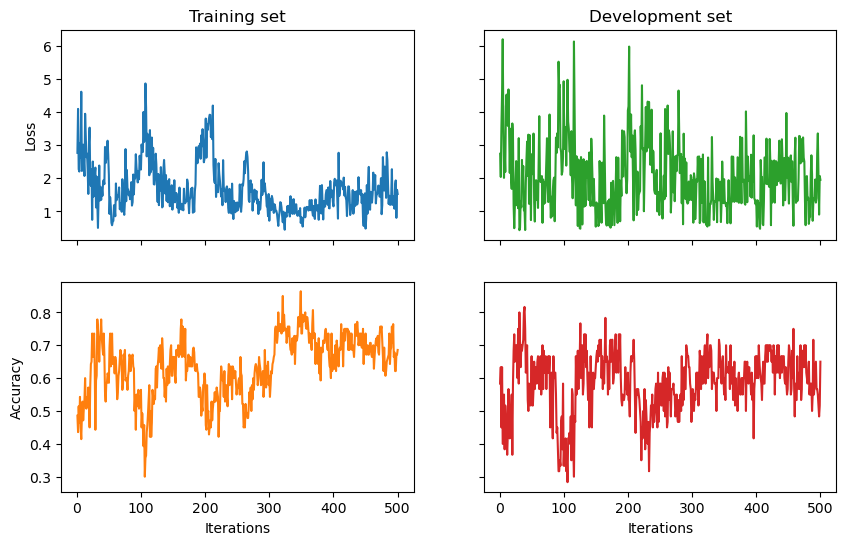

In [12]:
import matplotlib.pyplot as plt
import numpy as np

fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2,
                                                     sharex=True,
                                                     sharey='row',
                                                     figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
range_ = np.arange(1, len(train_cost) + 1)
ax_tl.plot(range_, train_cost, color=next(colours))
ax_bl.plot(range_, train_acc, color=next(colours))
ax_tr.plot(range_, val_cost, color=next(colours))
ax_br.plot(range_, val_acc, color=next(colours))

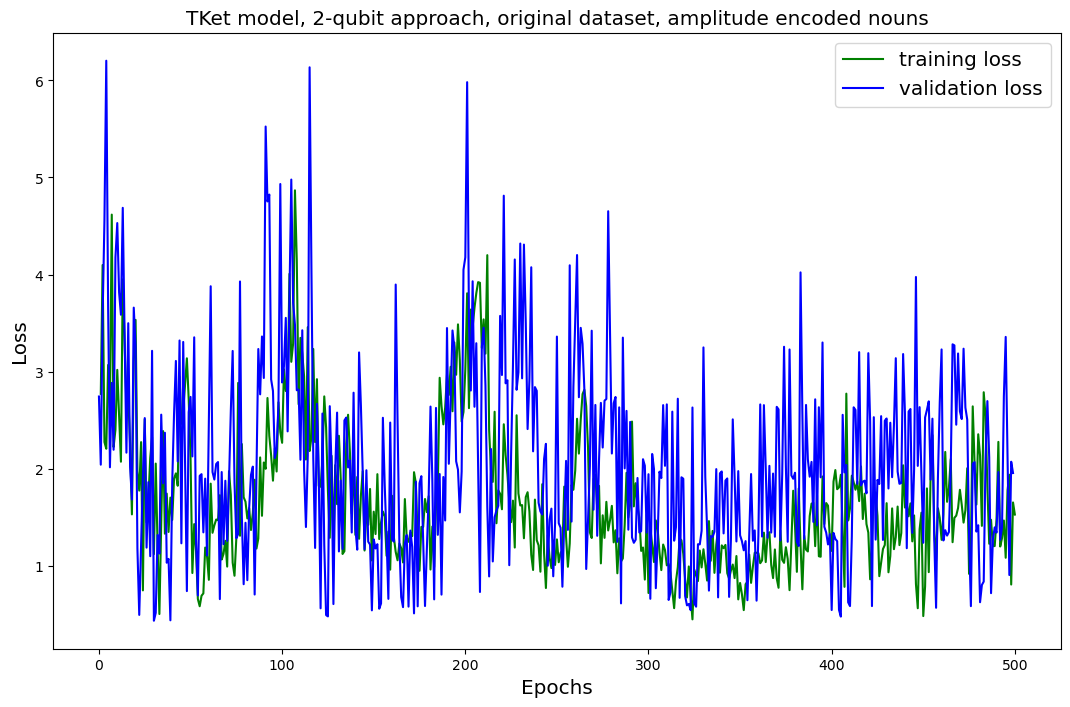

In [13]:
fig, ax1 = plt.subplots(figsize=(13, 8))

# ax1.plot(range_, trainer.train_epoch_costs, '-k', markersize=4, label='cost')
ax1.plot(range_, train_cost, '-g', markersize=4, label='training loss')
ax1.plot(range(len(val_cost)), val_cost, '-b', markersize=4, label='validation loss')
ax1.set_ylabel(r"Loss", fontsize='x-large')
ax1.set_xlabel(r"Epochs", fontsize='x-large')


ax1.legend(loc='upper right', fontsize='x-large')

if not GIJS: 
    if AE: 
        plt.title(model + ' model, ' + str(nQ) + '-qubit approach, original dataset, amplitude encoded nouns', fontsize='x-large')   
    else: 
        plt.title(model + ' model, ' + str(nQ) + '-qubit approach, original dataset', fontsize='x-large')
if GIJS: 
    if AE: 
        plt.title(model + ' model, ' + str(nQ) + '-qubit approach, new dataset, amplitude encoded nouns', fontsize='x-large')
    else: 
        plt.title(model + ' model, ' + str(nQ) + '-qubit approach, new dataset', fontsize='x-large')
plt.savefig('MC_task_ECS_Results.png', dpi=300, facecolor='white')  
plt.show()